In [1]:
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## Sigmoid Function
## Binary Classification with Sigmoid Function
## Logistic Regression
## By Jothi
## In real world, complex problems can not be solved by Linerar Equations and we need on liner eauations (Sigmoid)
##~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv("/content/DSAI-LVA-HealthRiskv1.csv")
#print(df.head())
#plt.scatter(df.AgeGroup,df.HealthRisk,marker='+',color='red')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['AgeGroup']],df.HealthRisk,train_size=0.8,random_state=10)
X_test

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

# X_test

y_predicted = model.predict_proba(X_test)

model.score(X_test,y_test)
model.predict_proba(X_test)

print("")
print("________Predicted Value vs. Given Value (Without Sigmoid)___________")
print(y_predicted)
print("")
print(X_test)
print("________Predicted Value vs. Given Value (Without Sigmoid)___________")
print("")

print("")
print("________Coef & Intercept___________")
print(model.coef_) # relationship between input and output variables in a model
print("")
print(model.intercept_) # If X sometimes equals 0, the intercept is simply the expected value of Y at that value.
## Most multiple regression models include a constant term (i.e., the intercept),
## since this ensures that the model will be unbiased-
print("")
print("________Coef & Intercept___________")

## ~~~~~~~~~~~~~~~~~~~
## sigmoid function
## ~~~~~~~~~~~~~~~~~~~
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

## ~~~~~~~~~~~~~~~~~~~
## prediction_function, which calls sigmoid function
## ~~~~~~~~~~~~~~~~~~~

def prediction_function(AgeGroup):
    z = 0.11 * AgeGroup - 4.20 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

print("")
print("________Predicted Value vs. Given Value (With Sigmoid)___________")
vAR_AgeGroup = 36
print("36 ==> No Risk")
print(prediction_function(vAR_AgeGroup)) ## Not in Risk
vAR_AgeGroup = 55
print("55 ==> Risk")
print(prediction_function(vAR_AgeGroup)) ## In Risk
print("")
print("________Predicted Value vs. Given Value (With Sigmoid)___________")



________Predicted Value vs. Given Value (Without Sigmoid)___________
[[0.07149888 0.92850112]
 [0.10786116 0.89213884]
 [0.88695589 0.11304411]
 [0.78084024 0.21915976]
 [0.73981614 0.26018386]
 [0.79952814 0.20047186]]

    AgeGroup
7         60
5         56
18        19
21        26
11        28
1         25
________Predicted Value vs. Given Value (Without Sigmoid)___________


________Coef & Intercept___________
[[0.11277822]]

[-4.2028033]

________Coef & Intercept___________

________Predicted Value vs. Given Value (With Sigmoid)___________
36 ==> No Risk
0.440286350732807
55 ==> Risk
0.8641271029909058

________Predicted Value vs. Given Value (With Sigmoid)___________


In [19]:
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## CV (Cross-validation) - RandomForestClassifier
## Stratified K-Fold
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True) ##  X =  Featuers and y= Target or Lables, or Output
#print(X)
#print(y)

vAR_clf = RandomForestClassifier()

cV_sk_folds = StratifiedKFold(n_splits = 5) ## Stratified K-Fold = 5

scores = cross_val_score(vAR_clf, X, y, cv = cV_sk_folds)

print("\n Cross Validation Scores: \n", scores)
print("\n Average CV Score: \n", scores.mean())
print("\n Number of CV Scores used in Average: \n", len(scores))


 Cross Validation Scores: 
 [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]

 Average CV Score: 
 0.9666666666666668

 Number of CV Scores used in Average: 
 5


In [20]:
for i, (train_index, test_index) in enumerate(cV_sk_folds.split(X, y)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100

In [ ]:
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## CV (Cross-validation)   - RandomForestClassifier
## Leave-One-Out (LOO)
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

vAR_clf = RandomForestClassifier(random_state=42)

cV_loo = LeaveOneOut()

scores = cross_val_score(vAR_clf, X, y, cv = cV_loo)

print("\n Cross Validation Scores: \n", scores)
print("\n Average CV Score: \n", scores.mean())
print("\n Number of CV Scores used in Average: \n", len(scores))


 Cross Validation Scores: 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]

 Average CV Score: 
 0.9533333333333334

 Number of CV Scores used in Average: 
 150


In [23]:
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## CV (Cross-validation)
## Leave-P-Out (LPO)
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeavePOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = RandomForestClassifier(random_state=42)

lpo = LeavePOut(p=3)

scores = cross_val_score(clf, X, y, cv = lpo)

print("\n Cross Validation Scores: \n", scores)
print("\n Average CV Score: \n", scores.mean())
print("\n Number of CV Scores used in Average: \n", len(scores))

KeyboardInterrupt: 

In [24]:
for i, (train_index, test_index) in enumerate(lpo.split(X, y)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index}")
  print(f"  Test:  index={test_index}")

Streaming output truncated to the last 5000 lines.
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149]
  Test:  index=[ 9 44 82]
Fold 98193:
  Train: index=[  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  90  91  92
  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
 147 148 149]
  Test:  index=[ 9 44 83]
Fold 98194:
  Train: index=[  0   1   2

KeyboardInterrupt: 

              precision    recall  f1-score   support

           1       0.57      0.67      0.62         6
           2       0.33      0.25      0.29         4

    accuracy                           0.50        10
   macro avg       0.45      0.46      0.45        10
weighted avg       0.48      0.50      0.48        10



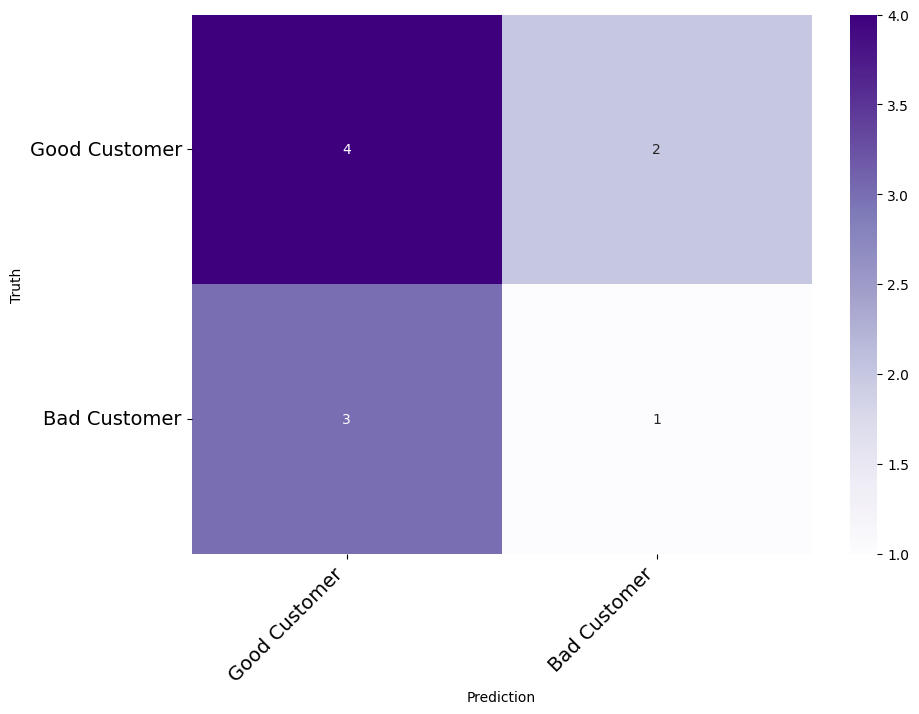

In [25]:
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`
##
## Confusion_Matrix (CM)
## Below are some parameters you can try (see below)
## True Positive
## False Positive
## True Negative
## False Negative
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~`

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd
import seaborn as sns

def fN_cALC_Cmatrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        #heatmap = sns.heatmap(df_cm, annot=True, fmt='.0%',cmap='Purples') ## Check This Out
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap='Purples') ## ???? # Check This Out
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')






vAR_truth_given_data =      ["1","2","1","1",      "1", "2", "2", "1",       "1", "2"] ## Lables (Given)
vAR_model_prediction = ["1","1",      "1","2","1", "2", "1",       "2", "1", "1"] ## Lables (Model Predicted one) ## What predictions did the model make?

cm = confusion_matrix(vAR_truth_given_data,vAR_model_prediction) ## Calculate Confusion_Matrix (CM)
fN_cALC_Cmatrix(cm,["Good Customer","Bad Customer"])  ## Confusion_Matrix (CM) in Heatmap

print(classification_report(vAR_truth_given_data, vAR_model_prediction)) ## Calculate classification report